In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive
[Errno 2] No such file or directory: '/gdrive/Images'
/content


In [2]:
%cd '/gdrive/My Drive/Images'

/gdrive/My Drive/Images


In [45]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage import exposure, transform
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import numpy as np
import math
import cv2
import scipy

In [5]:
image1 = imread(('1.jpg') , as_gray=True)

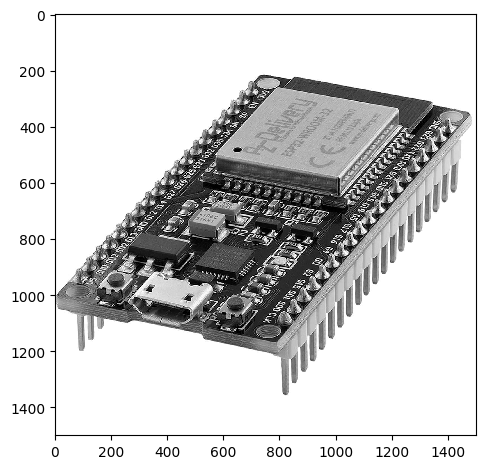

In [6]:
imshow(image1)

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


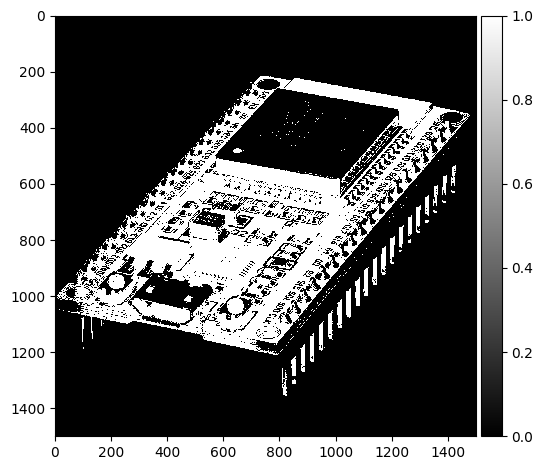

In [7]:
im = np.where(image1>128/256, 0, 1)
imshow(im, cmap=plt.get_cmap('gray'))

In [12]:
image2_gray = imread(('2.jpg') , as_gray=True)

In [13]:
def imageHist(image):
    _, axis = plt.subplots(ncols=2, figsize=(12, 3))
    if (image.ndim == 2):
        # Grascale Image
        axis[0].imshow(image, cmap=plt.get_cmap('gray'))
        axis[1].set_title('Histogram')
        axis[0].set_title('Grayscale Image')
        hist = exposure.histogram(image)
        axis[1].plot(hist[0])
    else:
        # Color image
        axis[0].imshow(image, cmap='gray')
        axis[1].set_title('Histogram')
        axis[0].set_title('Colored Image')
        rgbcolors = ['red', 'green', 'blue']
        for i, mycolor in enumerate(rgbcolors):
            axis[1].plot(exposure.histogram(image[...,i])[0], color=mycolor)

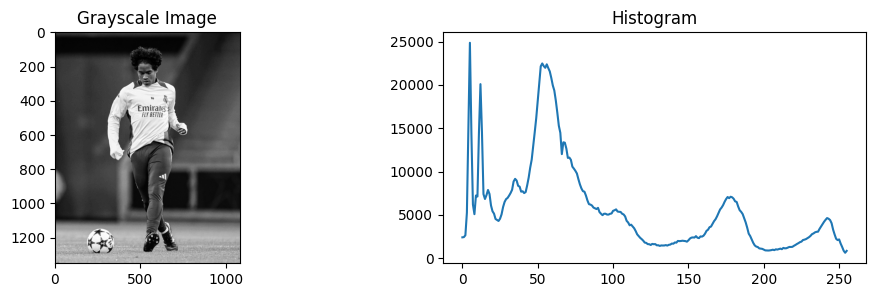

In [14]:
imageHist(image2_gray)

Rare image de Bobby dans les années 90.

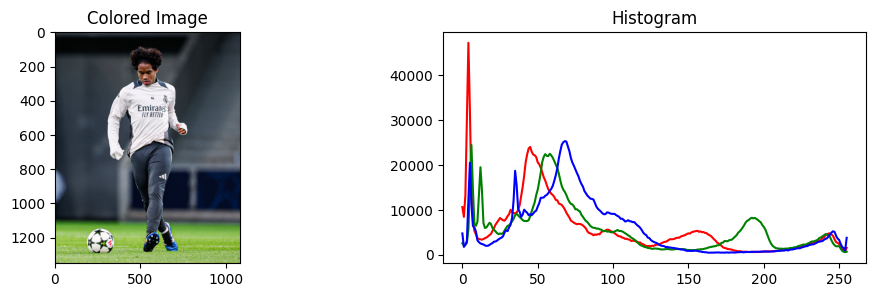

In [15]:
image2 = imread(('2.jpg'))
imageHist(image2)

In [17]:
image3_gray = imread(('3.jpg') , as_gray=True)

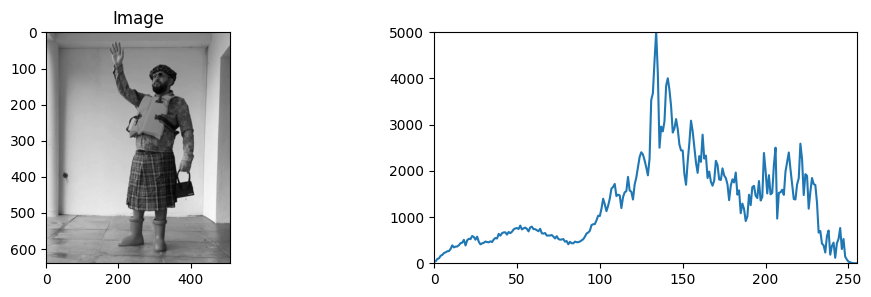

In [21]:
def histGrayScale(img, _xlim=255, _ylim=5000):
    _, axes = plt.subplots(ncols=2, figsize=(12, 3))
    ax = axes.ravel()
    ax[0].imshow(img, cmap=plt.get_cmap('gray'))
    ax[0].set_title('Image')
    hist = exposure.histogram(img)
    ax[1].plot(hist[0])
    # to provide a better display we just change the plot display
    ax[1].set_xlim([0, _xlim])
    ax[1].set_ylim([0, _ylim])
histGrayScale(image3_gray)

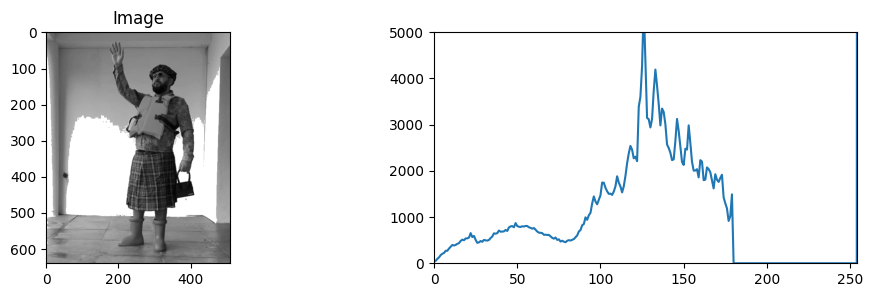

In [23]:
im = np.where(image3_gray>180/256, 1, image3_gray)
histGrayScale(im, 254, 5000)

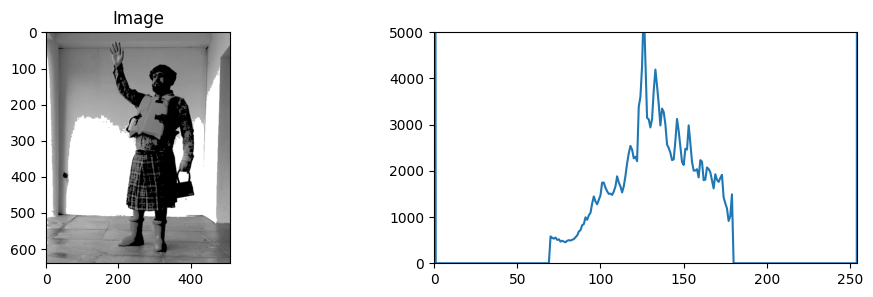

In [24]:
im = np.where(im<70/256, 0, im)
histGrayScale(im, 254, 5000)

##Récupérer les statistiques globales de l’image

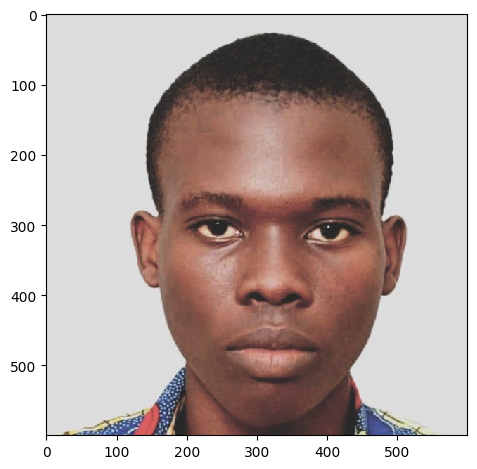

In [31]:
image4 = imread(('4.jpeg'))
imshow(image4)

In [32]:
import pandas as pd
def RGBStats(image):
    colors = []
    for i in range(0, 3):
        max_color =np.max(image[:,:,i])
        min_color =np.min(image[:,:,i])
        mean_color = np.mean(image[:,:,i])
        median_color = np.median(image[:,:,i])
        row = (min_color, max_color, mean_color, median_color)
        colors.append(row)
    return pd.DataFrame(colors,
                        index = ['Red', ' Green', 'Blue'],
                        columns = ['Min', 'Max', 'Mean', 'Median'])

RGBStats(image4)

Min  Max        Mean  Median
Red      31  240  173.857353   215.0
 Green   33  229  155.594106   208.0
Blue     26  253  151.130467   200.0

## Seuillage binaire sur la moyenne

In [33]:
image4_gray = rgb2gray(image4)

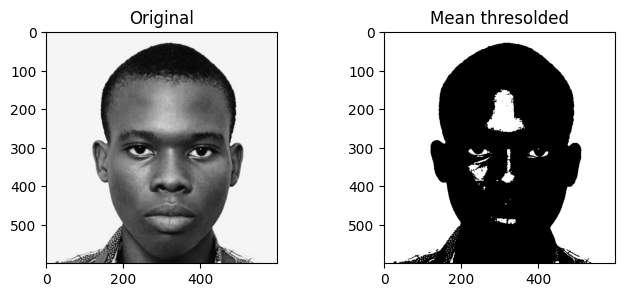

In [34]:
from skimage.filters import threshold_mean, threshold_otsu
def thresholdMeanDisplay(image):
    thresh = threshold_mean(image)
    binary = image > thresh
    fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
    ax = axes.ravel()
    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Original')
    ax[1].imshow(binary, cmap=plt.cm.gray)
    ax[1].set_title('Mean thresolded')

thresholdMeanDisplay(image4_gray)

## Seuillage Otsu

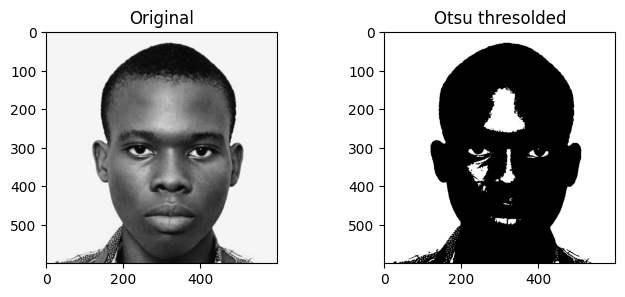

In [35]:
def thresholdOtsuDisplay(image):
    thresh = threshold_otsu(image)
    binary = image > thresh
    fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
    ax = axes.ravel()
    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Original')
    ax[1].imshow(binary, cmap=plt.cm.gray)
    ax[1].set_title('Otsu thresolded')

thresholdOtsuDisplay(image4_gray)

## Seuillage des images en couleur

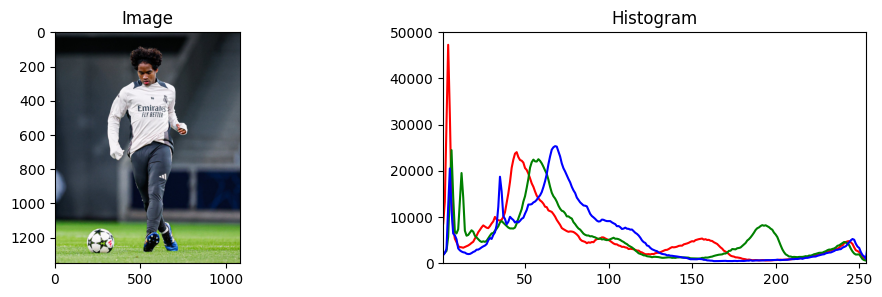

In [40]:
def histColor(img):
    _, axes = plt.subplots(ncols=2, figsize=(12, 3))
    axes[0].imshow(img)
    axes[0].set_title('Image')
    axes[1].set_title('Histogram')
    axes[1].plot(exposure.histogram(img[...,0])[0], color='red')
    axes[1].plot(exposure.histogram(img[...,1])[0], color='green')
    axes[1].plot(exposure.histogram(img[...,2])[0], color='blue')
    axes[1].set_xlim([1, 254])
    axes[1].set_ylim([0, 50000])
histColor(image2)

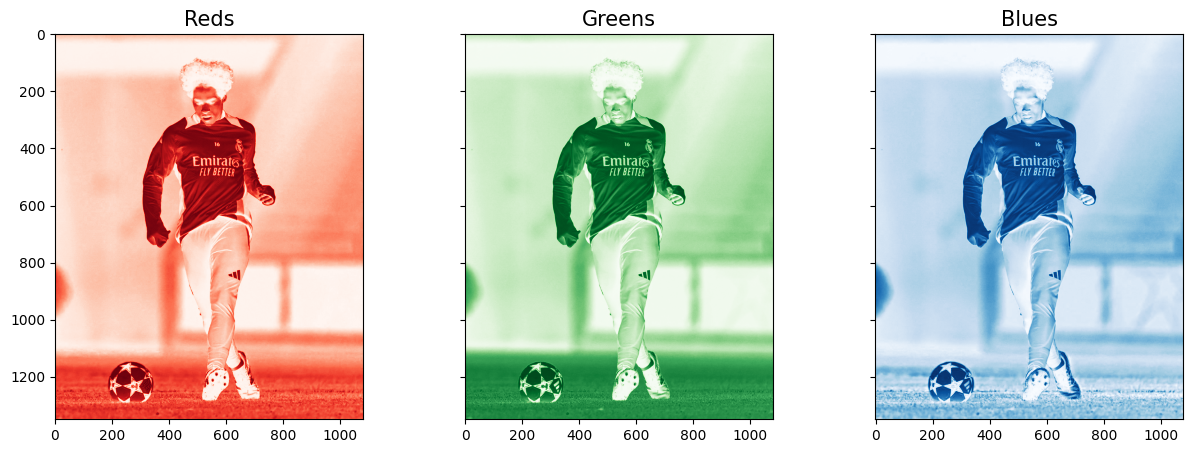

In [41]:
rgb = ['Reds','Greens','Blues']
_, axes = plt.subplots(1, 3, figsize=(15,5), sharey = True)
for i in range(3):
   axes[i].imshow(image2[:,:,i], cmap = rgb[i])
   axes[i].set_title(rgb[i], fontsize = 15)

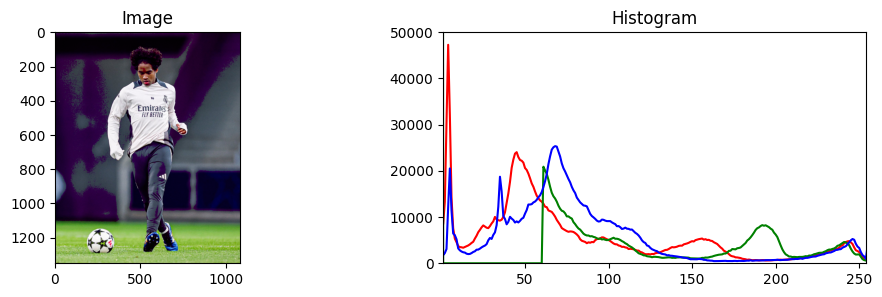

In [43]:
thresold_G = 60
image2_modified = image2.copy()
image2_modified[:,:,1] = np.where(image2[:,:,1]>thresold_G,
                                  image2[:,:,1],
                                  0)
histColor(image2_modified)

## Transformations Basiques et Morphologiques

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


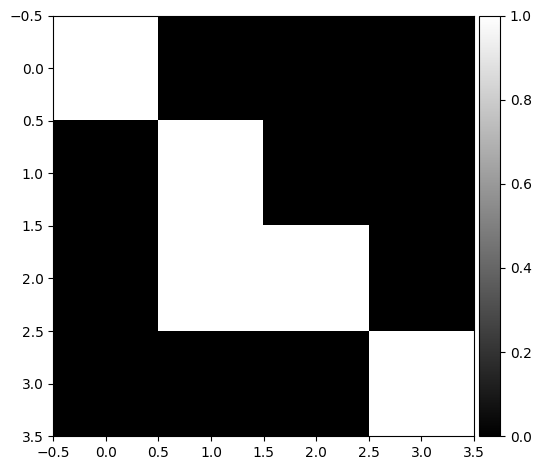

In [46]:
image_test = np.array([[1,0,0,0], [0,1,0,0], [0,1,1,0], [0,0,0,1]])
imshow(image_test, cmap=plt.get_cmap('gray'))

In [47]:
rotated = transform.rotate(image_test, angle=90, preserve_range=True)
print(rotated)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00]
 [1.2246468e-16 1.0000000e+00 1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


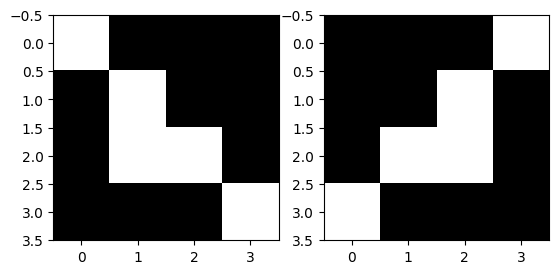

In [48]:
_, axes = plt.subplots(ncols=2)
axes[0].imshow(image_test, cmap=plt.get_cmap('gray'))
axes[1].imshow(rotated, cmap=plt.get_cmap('gray'))

In [49]:
#Changement de taille
resized_img = transform.resize(image=image_test, output_shape=(6,6), preserve_range=True)
print(resized_img)

[[0.72222222 0.5        0.13888889 0.02777778 0.         0.        ]
 [0.5        0.5        0.41666667 0.08333333 0.         0.        ]
 [0.16666667 0.5        0.86111111 0.30555556 0.08333333 0.02777778]
 [0.16666667 0.5        0.97222222 0.86111111 0.41666667 0.13888889]
 [0.08333333 0.25       0.5        0.5        0.5        0.5       ]
 [0.02777778 0.08333333 0.16666667 0.16666667 0.5        0.72222222]]


In [50]:
resized_img.shape

(6, 6)

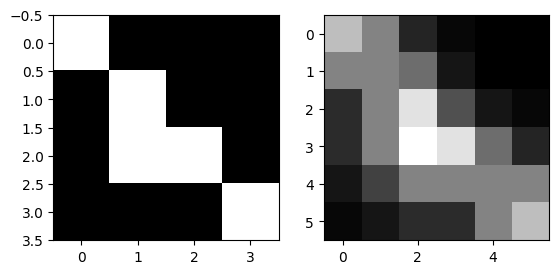

In [52]:
_, axes = plt.subplots(ncols=2)
axes[0].imshow(image_test, cmap=plt.get_cmap('gray'))
axes[1].imshow(resized_img, cmap=plt.get_cmap('gray'))

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


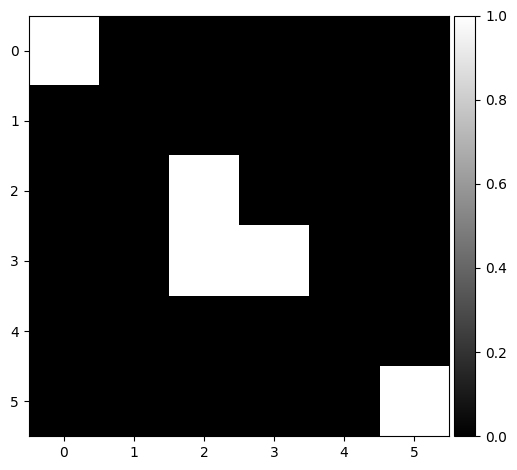

In [53]:
intresized = resized_img > 0.5
imshow(intresized.astype('int32'), cmap=plt.get_cmap('gray'))

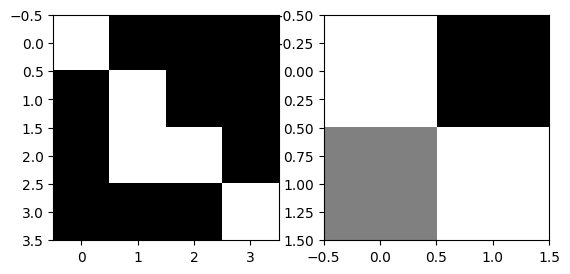

In [54]:
#Changement d'echelle
image_rescaled = transform.rescale(image=image_test, scale=1.0 / 2.0, anti_aliasing=False, preserve_range=True)
_, axes = plt.subplots(ncols=2)
axes[0].imshow(image_test, cmap=plt.get_cmap('gray'))
axes[1].imshow(image_rescaled, cmap=plt.get_cmap('gray'))

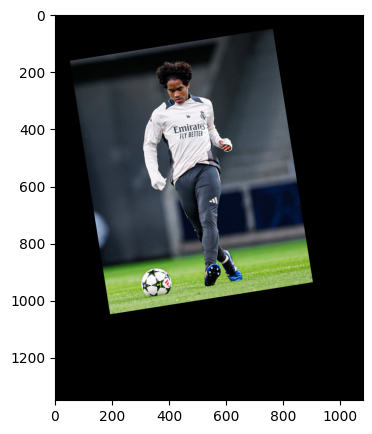

In [55]:
#Transformations euclidienne
tr = transform.SimilarityTransform(scale=1.5, rotation=math.pi/20, translation=(-40, -250))
plt.figure(figsize=(8, 5))
image_tr_2 = transform.warp(image2, tr)
plt.imshow(image_tr_2)

### Transformations morphologiques

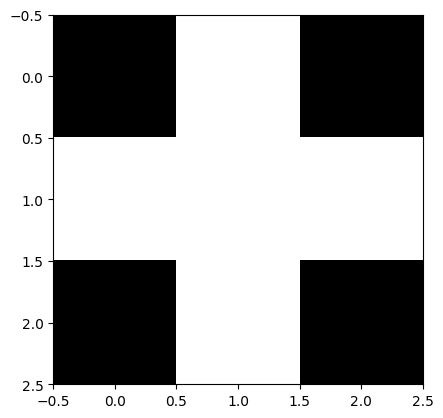

In [56]:
import numpy as np
from skimage import data
import matplotlib as plt
from skimage import morphology
from matplotlib.pyplot import imshow, get_cmap

#Gabarit
imshow(morphology.disk(1), cmap=get_cmap('gray'))

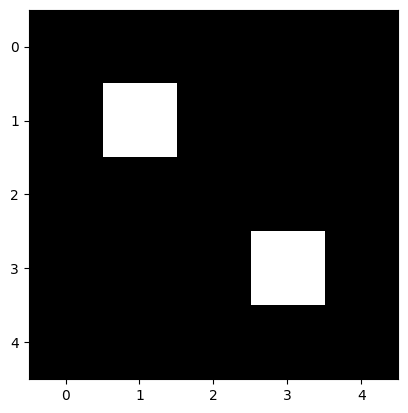

In [57]:
image_test = np.array([[0,0,0,0,0],
                       [0,1,0,0,0],
                       [0,0,0,0,0],
                       [0,0,0,1,0],
                       [0,0,0,0,0]])
imshow(image_test, cmap=get_cmap('gray'))
#Nous allons en faire une dilatation

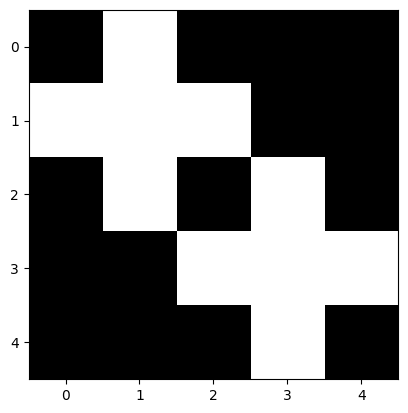

In [60]:
dilation = morphology.binary_dilation(image=image_test, footprint=morphology.disk(1))
imshow(dilation, cmap=get_cmap('gray'))

In [61]:
#Nous allons faire une erosion, l'inverse de la dilatation

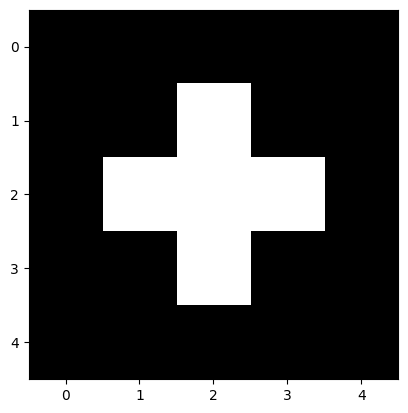

In [62]:
image_test = np.array([[0,0,0,0,0],
                       [0,0,1,0,0],
                       [0,1,1,1,0],
                       [0,0,1,0,0],
                       [0,0,0,0,0]])
imshow(image_test, cmap=get_cmap('gray'))

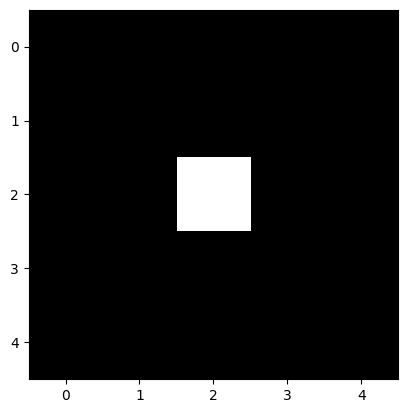

In [63]:
erosion = morphology.binary_erosion(image_test, morphology.disk(1))
imshow(erosion, cmap=get_cmap('gray'))

Parfois il faut faire des iterations pour ressentir l'effet d'une transformation morphologique

## Les filtres

L'idée premiere vers les CNN

In [69]:
from scipy import signal
from matplotlib.pyplot import imshow, get_cmap
import matplotlib as plt
import matplotlib.pyplot as plt

In [70]:
def displayTwoBaWImages(img1, img2):
  _, axes = plt.subplots(ncols=2)
  axes[0].imshow(img1, cmap=plt.get_cmap('gray'))
  axes[1].imshow(img2, cmap=plt.get_cmap('gray'))

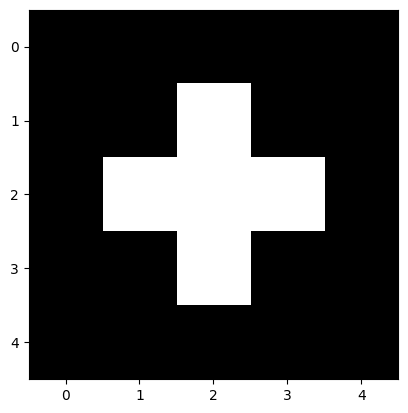

In [66]:
image_test = np.array([[0,0,0,0,0],
[0,0,1,0,0],
[0,1,1,1,0],
[0,0,1,0,0],
[0,0,0,0,0]])
imshow(image_test,
cmap=get_cmap('gray'))

In [67]:
kernel = np.ones((3,3), np.float32)/2

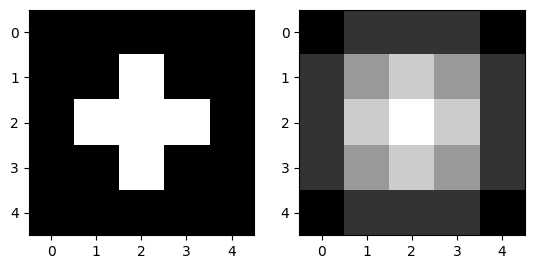

In [71]:
imgconvol = signal.convolve2d(image_test,
kernel,
mode='same',
boundary='fill',
fillvalue=0)
displayTwoBaWImages(image_test, imgconvol)

In [72]:
#Autres exemples

In [73]:
#Noyau de contour d'image
kernel_contour = np.array([[0,1,0],
[1,-4,1],
[0,1,0]])

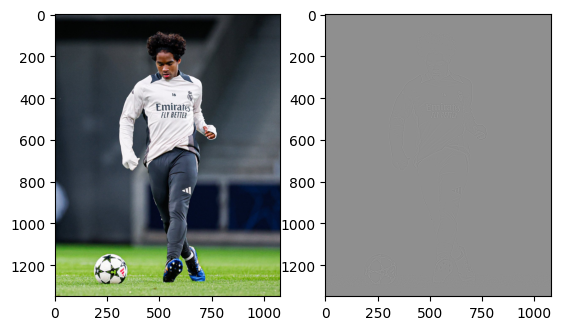

In [76]:
imgconvol = signal.convolve2d(image2_gray,
kernel_contour,
boundary='symm',
mode='same')
displayTwoBaWImages(image2, imgconvol)
imshow(imgconvol, cmap=get_cmap('gray'))

Il faut les changements de plus près

In [77]:
# Noyau de Contraste
kernel_inccontrast = np.array([[0,0,0,0,0],
[0,0,-1,0,0],
[0,-1,5,-1,0],
[0,0,-1,0,0],
[0,0,0,0,0]])

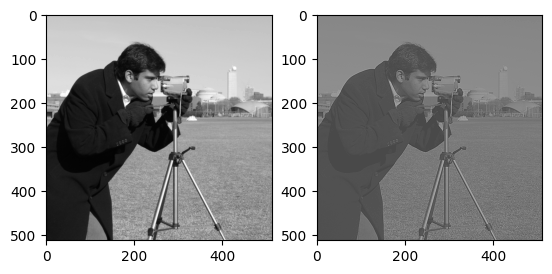

In [78]:
imgcontrast = signal.convolve2d(data.camera(),
kernel_inccontrast,
boundary='symm',
mode='same')
displayTwoBaWImages(data.camera(), imgcontrast)

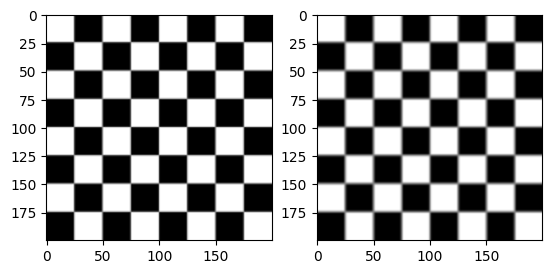

In [79]:
#Flouttage
kernel = np.array([[0,0,0,0,0],
[0,1,1,1,0],
[0,1,1,1,0],
[0,1,1,1,0],
[0,0,0,0,0]])
img = signal.convolve2d(data.checkerboard(),
kernel,
boundary='symm',
mode='same')
displayTwoBaWImages(data.checkerboard(), img)

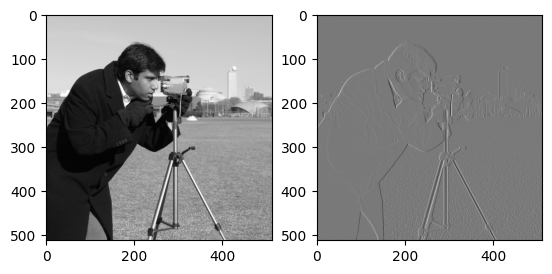

In [80]:
#Renforcement de bords
kernel = np.array([[0,0,0],
[-1,1,0,],
[0,0,0,]])
img = signal.convolve2d(data.camera(),
kernel,
boundary='symm',
mode='same')
displayTwoBaWImages(data.camera(), img)

## Convolution (Reseaux de neurones)

Ici, nous laissons le modèle détecté les filtres qu'il faut pour la détection d'image. [Exemple](https://colab.research.google.com/drive/15lHg76RswLNc0HIqBtJIFVHA5w1CRjT2?authuser=1#scrollTo=UuGAaBXuoHW1)




# Manipulation Niveau 2

In [82]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
import sys
import imageio
import scipy
import skimage

## Transformations géométriques(Interpolations)

In [83]:
def interpolation_ppv(image, scale):
    """Fonction effectuant le changement d'échelle de l'image `image` selon le facteur `scale`
       en utilisant l'interpolation par plus proche voisin.

   Paramètre(s) d'entrée
   -------------------
   image : ndarray
       Image (niveaux de gris) d'un type reconnu par Python.
   scale : float
       Paramètre de changement d'échelle. Un nombre réel strictement positif

   Paramètre(s) de sortie
   ----------------------
   image_p : ndarray
       Image interpolé àa la nouvelle échelle, de même type que `image`
   """
    # saving the type of the image
    dtype = image.dtype

    #Adding padding to the image to use it later for calculation
    img_p = np.pad(image.astype(np.float32), 1)

    # Calculation of the size of the original image and of the interpolated image
    height,width = image.shape
    Scaled_width = (width * scale)
    Scaled_height = (height * scale)

    # Calculation of pixel coordinates in the interpolated image
    Scaled_X_coordinates=np.linspace(1, int(width), num=int(Scaled_width))
    Scaled_Y_coordinates=np.linspace(1, int(height), num=int(Scaled_height))

    #Initialization of the final image
    finalMatrix= np.zeros(shape=(int(Scaled_height) ,int(Scaled_width)))

    #rounding my scaled positions
    Scaled_X_coordinates=np.round(Scaled_X_coordinates)
    Scaled_Y_coordinates=np.round(Scaled_Y_coordinates)

    #Empty pixels array Initialization
    pixels=[]

    #Here, i store every pixels from the original image using the scaled coordinates
    #into an array of pixels
    for Line in Scaled_Y_coordinates.astype(int)  :
        for Column in Scaled_X_coordinates.astype(int):
            pixel = img_p[Line,Column]
            pixels.append(pixel)

    #Here i reconstruct the scaled image using the array of pixels from above
    Pixel_counter=0
    for i in range(int(Scaled_height)):
        for j in range(int(Scaled_width)):
            finalMatrix[i][j]=pixels[Pixel_counter]
            Pixel_counter=Pixel_counter+1

    #returning final matrix with the same type as the given img
    return finalMatrix.astype(dtype)

<ipython-input-86-b899bbe36adc>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img =  imageio.imread("5.png", mode="L").astype(dtype='float')


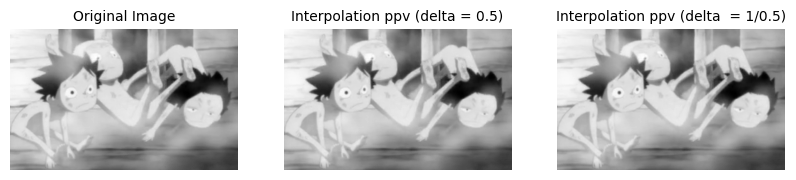

In [86]:
img =  imageio.imread("5.png", mode="L").astype(dtype='float')
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(131)
plt.title('Original Image', fontsize=10)
plt.imshow(img,cmap='gray')
plt.axis('off')
ax = f.add_subplot(132)
plt.title('Interpolation ppv (delta = 0.5)', fontsize=10)
New_Img_ppv=interpolation_ppv(img, 0.5)
plt.imshow(New_Img_ppv,cmap='gray')
plt.axis('off')
ax = f.add_subplot(133)
plt.title('Interpolation ppv (delta  = 1/0.5)', fontsize=10)
FinalImageppv=interpolation_ppv(New_Img_ppv,1/0.5)
plt.imshow(FinalImageppv,cmap='gray')
plt.axis('off')
plt.show()

In [88]:
Err_Q_ppv = ((img-FinalImageppv)**2).mean()
print("Δ𝑄 avec l'interpolation par plus proche voisin: %.2f" % Err_Q_ppv)

Δ𝑄 avec l'interpolation par plus proche voisin: 3.72


Image Original


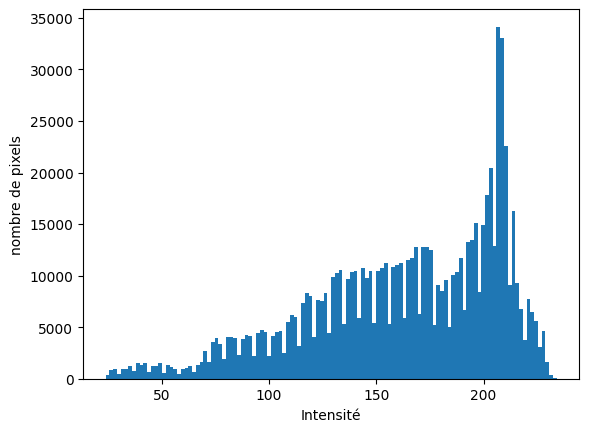

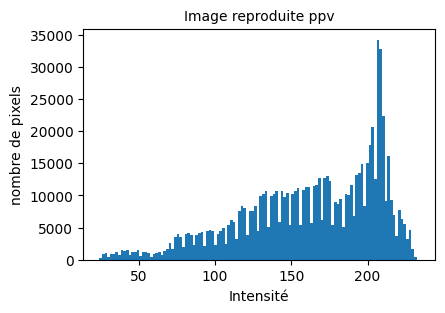

In [90]:
print("Image Original")
plt.hist(img.ravel(), bins=120)
plt.xlabel('Intensité')
plt.ylabel('nombre de pixels')
plt.show()
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
plt.title('Image reproduite ppv', fontsize=10)
plt.hist(FinalImageppv.ravel(), bins=120)
plt.xlabel('Intensité')
plt.ylabel('nombre de pixels')

plt.show()

## Débruitage par filtrage spatial avec scipy

Moyennage simple

<ipython-input-91-7157e33cfee2>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img =  imageio.imread("6.jpeg", mode="L").astype(dtype='float')


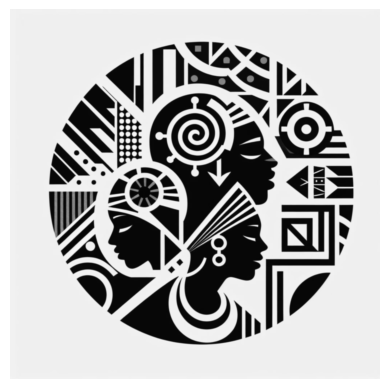

In [91]:
import scipy.ndimage

img =  imageio.imread("6.jpeg", mode="L").astype(dtype='float')
noyau = np.ones((3,3)) / (9**2)
img_simple = scipy.ndimage.convolve(img, noyau)
plt.axis('off')
plt.imshow(img_simple,cmap='gray')

Moyennage pondéré de type gaussien

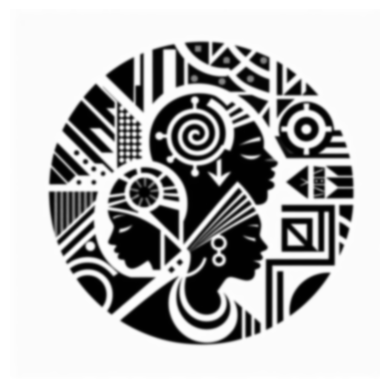

In [92]:
from scipy.ndimage import gaussian_filter
img_gauss = gaussian_filter(img, (3, 3))
plt.axis('off')
plt.imshow(img_gauss,cmap='gray' ); plt.show()

Filtrage médian

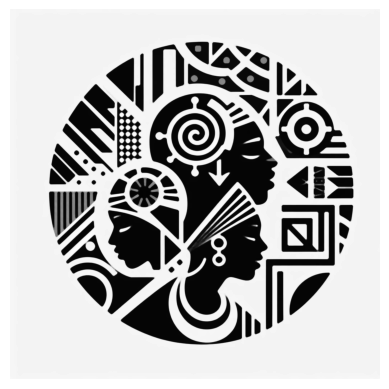

In [93]:
from scipy import ndimage
img_median = ndimage.median_filter(img, (7,7))
plt.axis('off')
plt.imshow(img_median,cmap='gray'); plt.show()

Bruit résidue

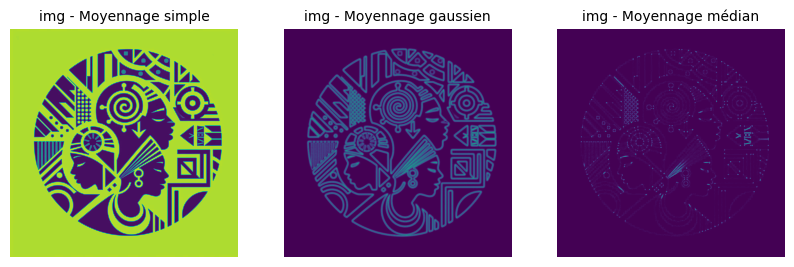

Δ𝑄 utilisant le filtre simple: 31003.75
Δ𝑄 utilisant le filtre guassien: 790.52
Δ𝑄 utilisant le filtre median: 106.01


In [94]:
f = plt.figure(figsize=(10,5))
Bruit = abs(img-img_simple)
ax = f.add_subplot(131)
plt.title('img - Moyennage simple', fontsize=10)
plt.axis('off')
plt.imshow(Bruit)



Bruit = abs(img-img_gauss)
ax = f.add_subplot(132)
plt.title('img - Moyennage gaussien', fontsize=10)
plt.axis('off')
plt.imshow(Bruit)


Bruit = abs(img-img_median)
ax = f.add_subplot(133)
plt.title('img - Moyennage médian', fontsize=10)
plt.axis('off')
plt.imshow(Bruit)
plt.show()

# Erreur quadratique moyenne.

Err_Q_Moy_simple = ((img-img_simple)**2).mean()
Err_Q_Moy_Gauss = ((img-img_gauss)**2).mean()
Err_Q_Moy_Median = ((img-img_median)**2).mean()

print("Δ𝑄 utilisant le filtre simple: %.2f" % Err_Q_Moy_simple)
print("Δ𝑄 utilisant le filtre guassien: %.2f" % Err_Q_Moy_Gauss)
print("Δ𝑄 utilisant le filtre median: %.2f" % Err_Q_Moy_Median)


##  Amélioration d'images

<ipython-input-95-85682c057a63>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img =  imageio.imread("5.png", mode="L").astype(dtype='float')


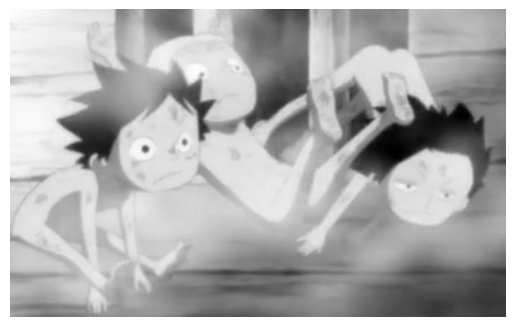

In [95]:
img =  imageio.imread("5.png", mode="L").astype(dtype='float')
plt.axis('off')
plt.imshow(img,cmap='gray'); plt.show()

### Transformations portant sur l'intensité

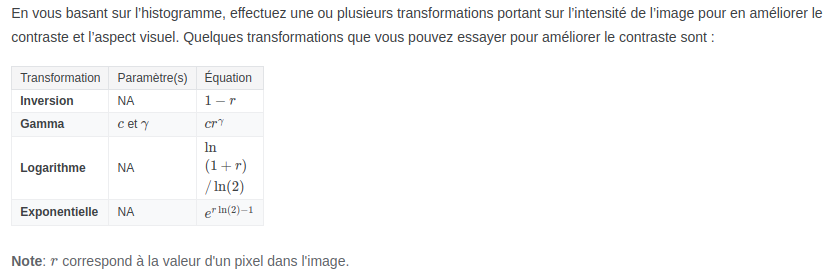

Transformation : Logarithme + gamma

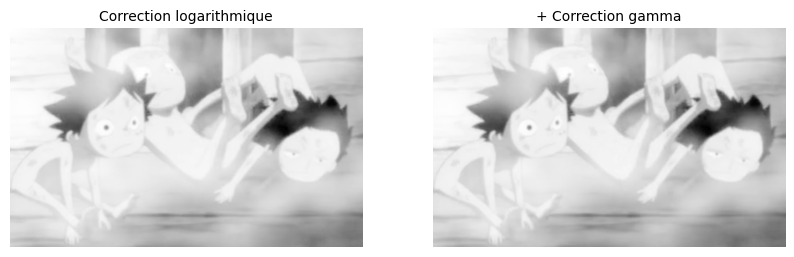

In [96]:
#Correction logarithmique
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(121)
c = 255/(np.log(1 + np.max(img)))
img_transformed = c * np.log(1 + img)
plt.title('Correction logarithmique', fontsize=10)
plt.axis('off')
plt.imshow(img_transformed,cmap='gray');

#Correction Gamma appliqué par dessus la correction log
ax = f.add_subplot(122)
gamma=1.5
gamma_corrected = np.array(255*(img_transformed / 255) ** gamma, dtype = 'float')
plt.title('+ Correction gamma', fontsize=10)
plt.axis('off')
plt.imshow(gamma_corrected,cmap='gray'); plt.show()

###  Affinage de l'image

In [97]:
def masque_flou(image, a=1, b=3):
    """Filtre de type `masque flou`

    Paramètres
    ----------
    image : ndarray
        Image à rehausser
    a : float
        Coefficient de rehaussement
    b : int
        Taille du filtre adoucisseur (sigma de la gaussienne)

    Sortie
    ------
    image_p : ndarray
        Image rehaussée
    """
    image_flou = gaussian_filter(image, (b, b))
    image_p = image + a*(image - image_flou)

    return image_p.astype(dtype='float')

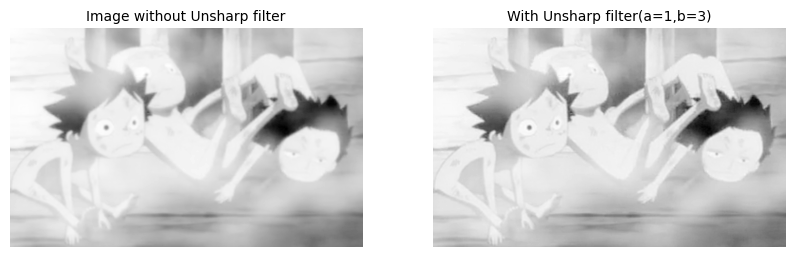

Differentes variations de a et b


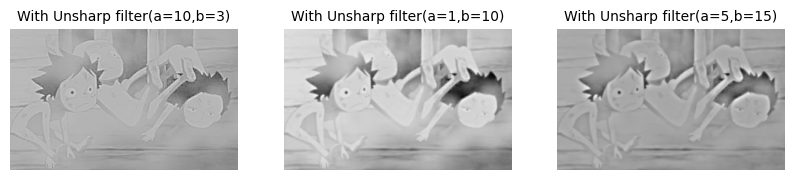

In [98]:
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(121)

plt.title('Image without Unsharp filter', fontsize=10)
plt.axis('off')
plt.imshow(gamma_corrected,cmap='gray')
ax = f.add_subplot(122)
plt.title('With Unsharp filter(a=1,b=3)', fontsize=10)
plt.axis('off')
img_unsharpened = masque_flou(gamma_corrected,1,3)
plt.imshow(img_unsharpened,cmap='gray'); plt.show()

f = plt.figure(figsize=(10,10))
print("Differentes variations de a et b")
ax = f.add_subplot(131)
plt.title('With Unsharp filter(a=10,b=3)', fontsize=10)
img_unsharpened = masque_flou(gamma_corrected,10,3)
plt.axis('off')
plt.imshow(img_unsharpened,cmap='gray')

ax = f.add_subplot(132)
plt.title('With Unsharp filter(a=1,b=10)', fontsize=10)
img_unsharpened = masque_flou(gamma_corrected,1,10)
plt.axis('off')
plt.imshow(img_unsharpened,cmap='gray')

ax = f.add_subplot(133)
plt.title('With Unsharp filter(a=5,b=15)', fontsize=10)
img_unsharpened = masque_flou(gamma_corrected,5,15)
plt.axis('off')
plt.imshow(img_unsharpened,cmap='gray'); plt.show()


### Égalisation d'histogramme

Histogramme


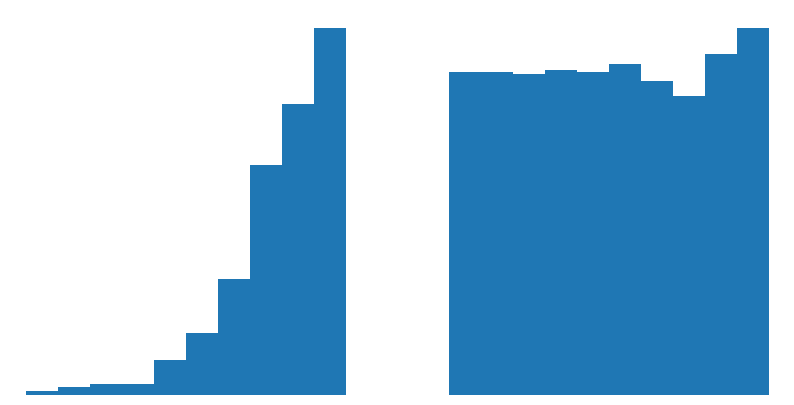

Resultats


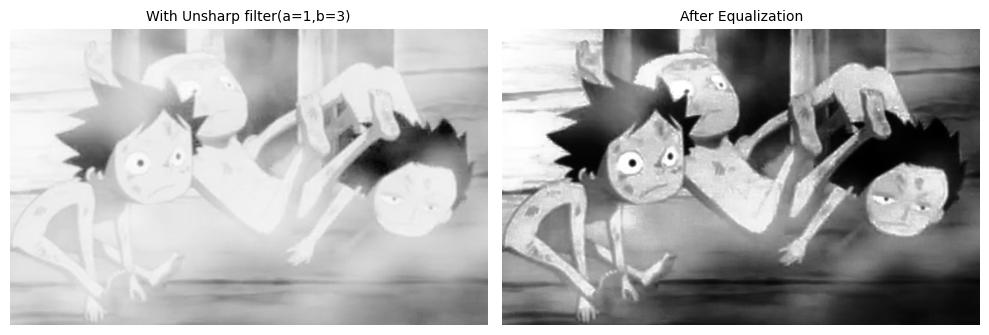

In [99]:
from skimage import exposure
img_unsharpened = masque_flou(gamma_corrected,1,3)
img_equalized = (exposure.equalize_hist(img_unsharpened))

print("Histogramme")
f = plt.figure(figsize=(10,5))

ax = f.add_subplot(121)
plt.hist(img_unsharpened.ravel(), bins=10)
plt.axis('off')
ax = f.add_subplot(122)
plt.hist(img_equalized.ravel(), bins=10)
plt.axis('off')
plt.show()

print("Resultats")
f = plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('With Unsharp filter(a=1,b=3)', fontsize=10)
plt.imshow(img_unsharpened, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title('After Equalization', fontsize=10)
plt.imshow(img_equalized, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()

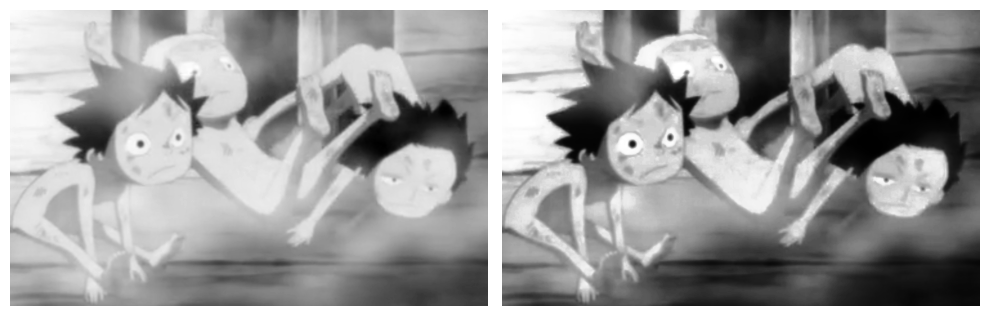

In [100]:
img_equalized = (exposure.equalize_hist(img))


f = plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(img_equalized, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()